In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('only_calls.csv')

In [10]:
df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
1,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg
2,abethr1,[],"['call', 'song']",-2.9965,37.6244,Turdus tephronotus,African Bare-eyed Thrush,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://www.xeno-canto.org/432639,abethr1/XC432639.ogg
3,abethr1,[],"['adult', 'call', 'sex uncertain', 'song']",-2.9858,37.5975,Turdus tephronotus,African Bare-eyed Thrush,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/639039,abethr1/XC639039.ogg
4,abhori1,['combul2'],"['call', 'song']",-15.9259,29.0292,Oriolus larvatus,African Black-headed Oriole,Rory Nefdt,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/120250,abhori1/XC120250.ogg


In [23]:
print(df['type'].unique())

["['call']" "['call', 'song']"
 "['adult', 'call', 'sex uncertain', 'song']" "['Display call']"
 "['alarm call']" "['alarm call', 'call']" "['alarm call', 'song']"
 "['call', 'footsteps', 'wind']" "['call', 'female', 'male']"
 "['call', 'sex uncertain']" "['adult', 'call', 'sex uncertain']"
 "['adult', 'call', 'song']"
 "['adult', 'alarm call', 'call', 'sex uncertain', 'song']"
 "['call', 'flight call']" "['adult', 'flight call', 'sex uncertain']"
 "['call', 'female', 'flight call', 'male', 'song']" "['call', 'male']"
 "['flight call']" "['call', 'duet']" "['adult', 'call']"
 "['adult', 'flight call']" "['call,begging call,juvenile']"
 "['call', 'juvenile', 'sex uncertain']"
 "['call', 'life stage uncertain', 'sex uncertain']"
 "['call', 'female', 'male', 'song']"
 "['begging call', 'juvenile', 'sex uncertain']"
 "['call', 'sex uncertain', 'song']" "['call', 'juvenile']"
 "['call', 'juvenile', 'song']" "['call', 'female']"
 "['begging call', 'juvenile']" "['call', 'male', 'song']"
 "['

In [11]:
# Liste der relevanten Call-Arten
call_types = {"'call'"}  # Ergänze nach Bedarf

# Filtern der Spalte 'type'
filter_call = df[df["type"].apply(lambda x: any(call in call_types for call in x))]


In [12]:
print(len(filter_call))

0


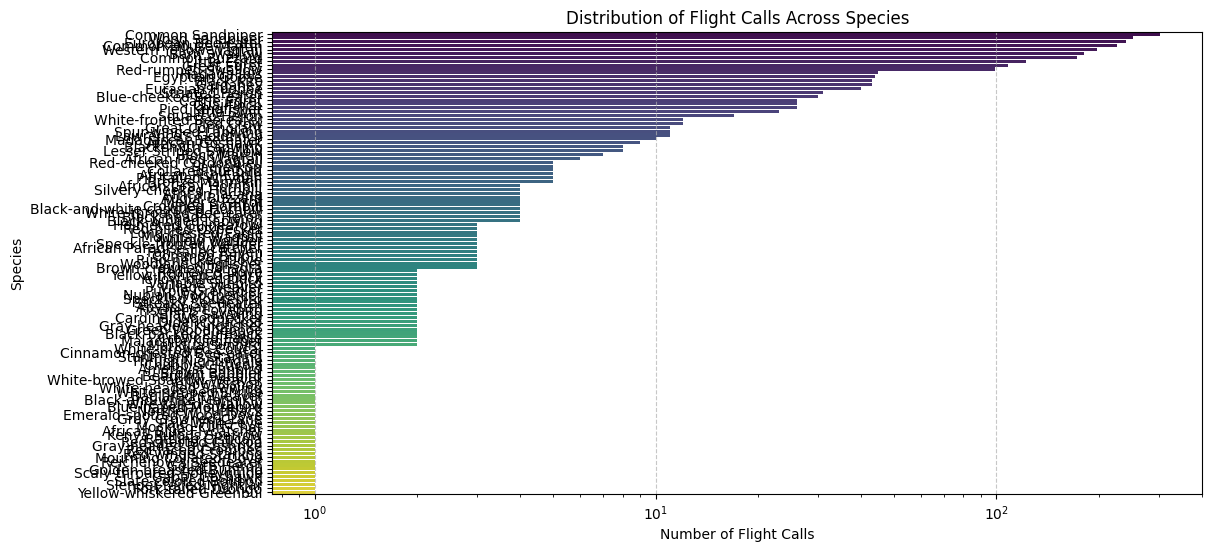

In [35]:

# Alle einzigartigen Arten aus dem Datensatz holen
species_list = df["common_name"].unique()

# Dataset filtern, um nur relevante Arten zu behalten
df_filtered = df[df["common_name"].isin(species_list)]

# Nur Einträge mit "alarm call" im Typ-Feld auswählen
df_alarm_calls = df_filtered[df_filtered["type"].str.contains(r"\bflight call\b", case=False, na=False)]

# Anzahl der Alarmrufe pro Art berechnen
alarm_call_counts = df_alarm_calls.groupby("common_name").size().reset_index(name="Flight Call Count")

# Sortieren für bessere Visualisierung
alarm_call_counts = alarm_call_counts.sort_values(by="Flight Call Count", ascending=False)

# Falls Daten vorhanden sind, visualisieren
if not alarm_call_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=alarm_call_counts, x="Flight Call Count", y="common_name", palette="viridis")
    plt.xlabel("Number of Flight Calls")
    plt.ylabel("Species")
    plt.title("Distribution of Flight Calls Across Species")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.xscale("log")

    plt.show()
else:
    print("No flight calls found for the specified species.")


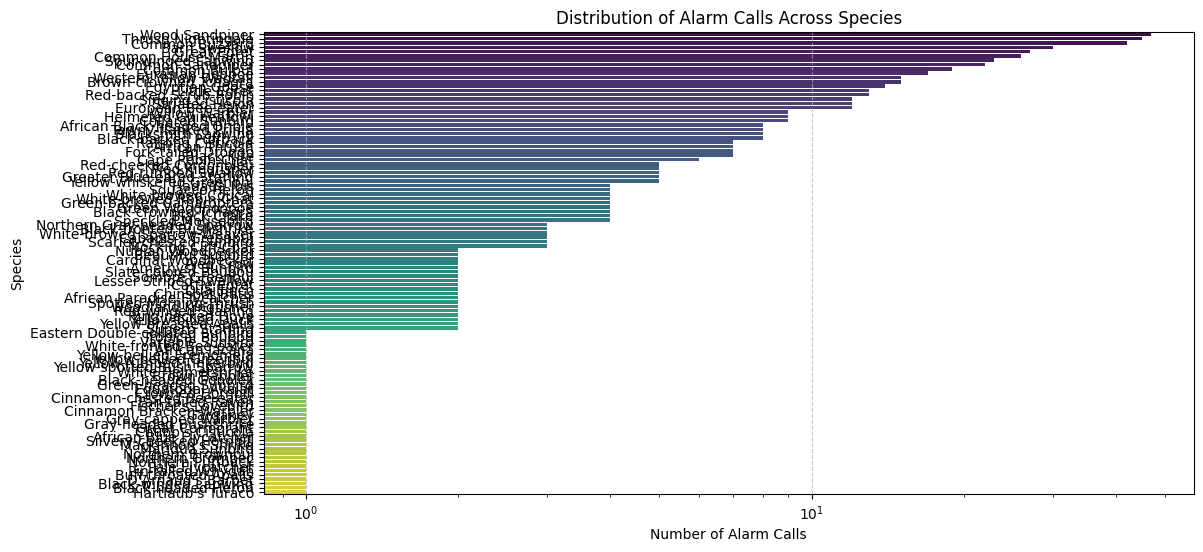

In [ ]:

# Alle einzigartigen Arten aus dem Datensatz holen
species_list = df["common_name"].unique()

# Dataset filtern, um nur relevante Arten zu behalten
df_filtered = df[df["common_name"].isin(species_list)]

# Nur Einträge mit "alarm call" im Typ-Feld auswählen
df_alarm_calls = df_filtered[df_filtered["type"].str.contains(r"\balarm call\b", case=False, na=False)]

# Anzahl der Alarmrufe pro Art berechnen
alarm_call_counts = df_alarm_calls.groupby("common_name").size().reset_index(name="Alarm Call Count")

# Sortieren für bessere Visualisierung
alarm_call_counts = alarm_call_counts.sort_values(by="Alarm Call Count", ascending=False)

# Falls Daten vorhanden sind, visualisieren
if not alarm_call_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=alarm_call_counts, x="Alarm Call Count", y="common_name", palette="viridis")
    plt.xlabel("Number of Alarm Calls")
    plt.ylabel("Species")
    plt.title("Distribution of Alarm Calls Across Species")
    plt.grid(axis="x", linestyle="--", alpha=0.7)

    #log function
    plt.xscale("log")

    plt.show()


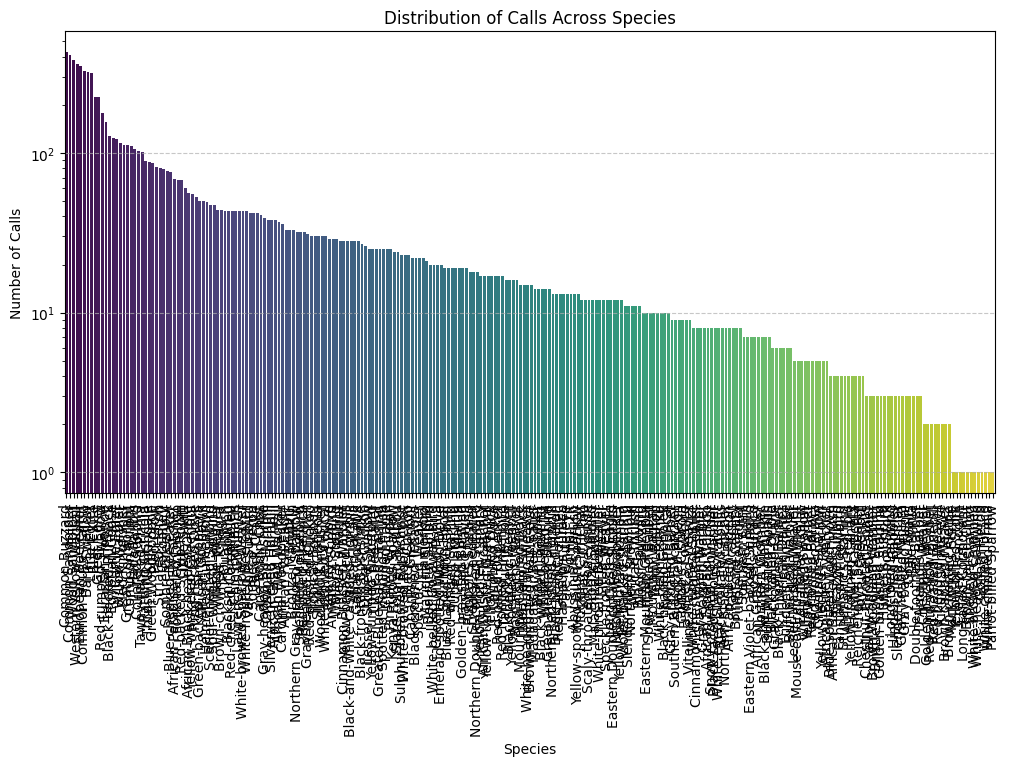

In [ ]:

# Alle einzigartigen Arten aus dem Datensatz holen
species_list = df["common_name"].unique()

# Dataset filtern, um nur relevante Arten zu behalten
df_filtered = df[df["common_name"].isin(species_list)]

# Nur Einträge mit "alarm call" im Typ-Feld auswählen
df_alarm_calls = df_filtered[df_filtered["type"].str.contains(r"\bcall\b", case=False, na=False)]

# Anzahl der Alarmrufe pro Art berechnen
alarm_call_counts = df_alarm_calls.groupby("common_name").size().reset_index(name="Call Count")

# Sortieren für bessere Visualisierung
alarm_call_counts = alarm_call_counts.sort_values(by="Call Count", ascending=False)

# Falls Daten vorhanden sind, visualisieren
if not alarm_call_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=alarm_call_counts, x="common_name", y="Call Count", palette="viridis")
    plt.xlabel("Species")
    plt.ylabel("Number of Calls")
    plt.xticks(rotation=90)
    plt.title("Distribution of Calls Across Species")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.yscale("log")
    plt.show()

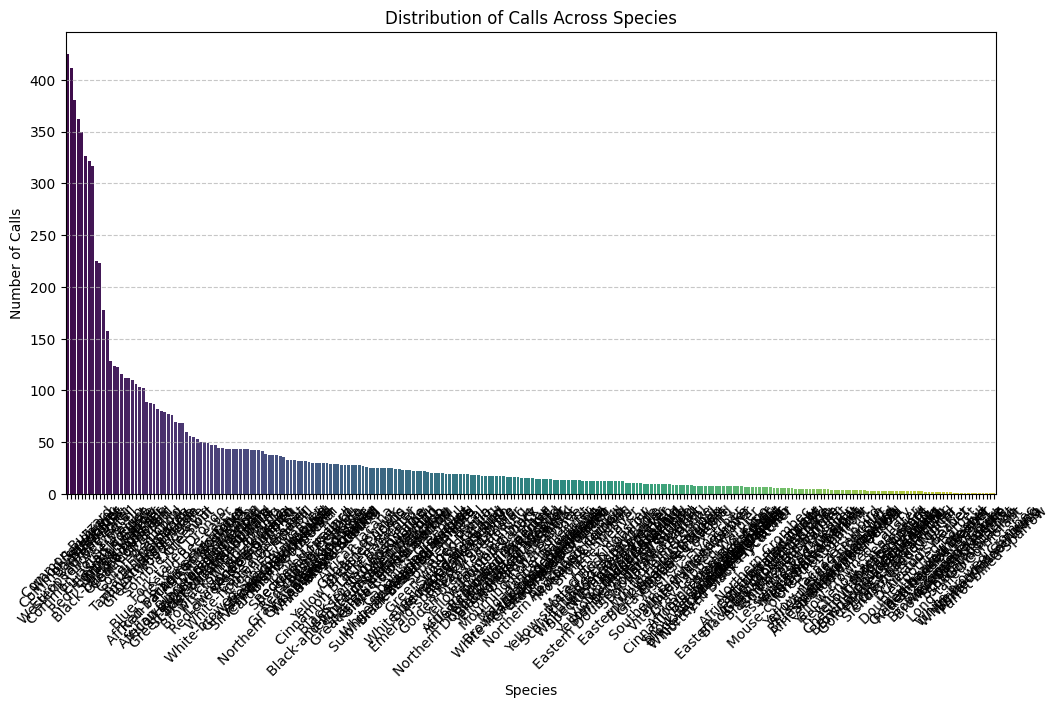

In [43]:

# Alle einzigartigen Arten aus dem Datensatz holen
species_list = df["common_name"].unique()

# Dataset filtern, um nur relevante Arten zu behalten
df_filtered = df[df["common_name"].isin(species_list)]

# Nur Einträge mit "alarm call" im Typ-Feld auswählen
df_alarm_calls = df_filtered[df_filtered["type"].str.contains(r"\bcall\b", case=False, na=False)]

# Anzahl der Alarmrufe pro Art berechnen
alarm_call_counts = df_alarm_calls.groupby("common_name").size().reset_index(name="Call Count")

# Sortieren für bessere Visualisierung
alarm_call_counts = alarm_call_counts.sort_values(by="Call Count", ascending=False)

# Falls Daten vorhanden sind, visualisieren
if not alarm_call_counts.empty:

    plt.figure(figsize=(12, 6))
    sns.barplot(data=alarm_call_counts, x="common_name", y="Call Count", palette="viridis")
    plt.xlabel("Species")
    plt.ylabel("Number of Calls")
    plt.xticks(rotation=45)
    plt.title("Distribution of Calls Across Species")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    #plt.xscale("log")

    plt.show()
else:
    print("No  calls found for the specified species.")
